## Heba Allah Emad

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df['Species'] = df['Species'].replace({'Iris-setosa': 'Setosa', 'Iris-versicolor': 'Versicolor', 'Iris-virginica': 'Virginica'})


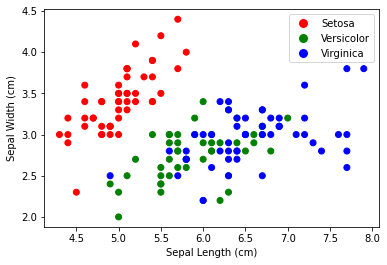

In [8]:
colors = {'Setosa':'r', 'Versicolor':'g', 'Virginica':'b'}
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].apply(lambda x: colors[x]))
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Setosa', markerfacecolor='r', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Versicolor', markerfacecolor='g', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Virginica', markerfacecolor='b', markersize=10)])
plt.show()


<AxesSubplot:>

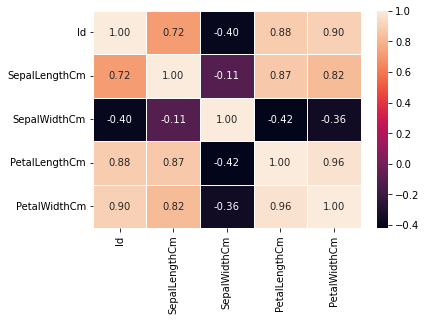

In [9]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='.2f',linewidth=1)

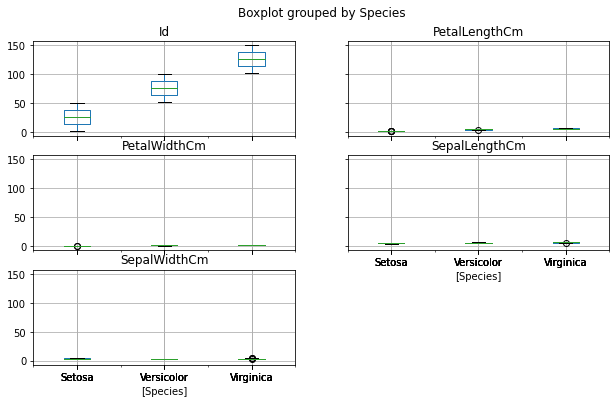

In [10]:
df.boxplot(by='Species', figsize=(10, 6))
plt.show()

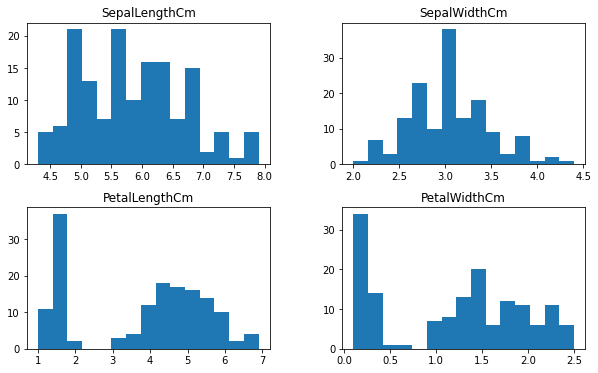

In [11]:
df.hist(column=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
          bins=15, grid=False, figsize=(10,6))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

x = df.drop('Species',axis=1)
y = df['Species']


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## Decision Tree Algorithm 

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=30)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=30)

In [15]:
y_pred = tree.predict(x_test)
y_pred

array(['Setosa', 'Virginica', 'Setosa', 'Virginica', 'Versicolor',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica',
       'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Setosa',
       'Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Virginica',
       'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Setosa'],
      dtype=object)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[19  0  0]
 [ 0 12  0]
 [ 0  1 13]]


In [17]:
print('Accuracy of Decision Tree data : ', accuracy_score(y_test, y_pred)*100)

Accuracy of Decision Tree data :  97.77777777777777
